# Training an Autoencoder model

In this demo, we go through the process of training an autoencoder model. We use a basic architecture for PyTorch.

As the input data, we use the Fashion MNIST dataset, as it demonstrates the possibilities of autoencoders without the hassle of finding new data.

If you would like to explore more datasets to train your autoencoder, please take a look at the torchvision library here: https://pytorch.org/vision/stable/datasets.html

This tutorial is based on the tutorial from: https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/

With the following modifications:
* changed the dataset to Fashion MNIST
* added visualization of the autoencoder
* minor bug-fixes

In [1]:
# installing the visualization module that
# we will later use for drawing the autoencoder architecture
!pip install -q torchviz

In [41]:
# imports needed for the autoencoder itself
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

# standard libraries
import pandas as pd
import numpy as np

# imports needed for the visualizaation of the network
from torchviz import make_dot

In [ ]:
!pip install -q datasets

In [77]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.FashionMNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)

100%|██████████| 26421880/26421880 [00:00<00:00, 103537918.55it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 4198002.05it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 64208679.17it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4502142.83it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [78]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [79]:

# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

In [90]:
epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:

      # Reshaping the image to (-1, 784)
      image = image.reshape(-1, 28*28)

      # Output of Autoencoder
      reconstructed = model(image)

      # Calculating the loss function
      loss = loss_function(reconstructed, image)

      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Storing the losses in a list for plotting
      losses.append(loss)
    outputs.append((epochs, image, reconstructed))


<ipython-input-95-28e199358eeb>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


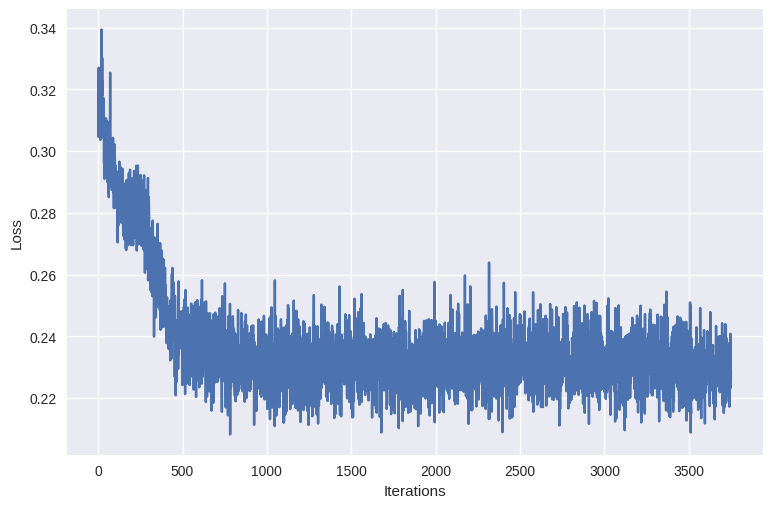

In [95]:
# Defining the Plot Style
plt.style.use('seaborn')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Convert the list to a PyTorch tensor
losses_tensor = torch.tensor(losses)

# Plotting the last 100 values
plt.plot(losses_tensor.detach().numpy()[::-1])

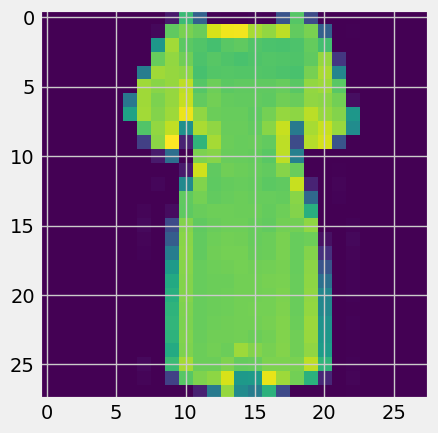

In [84]:
for i, item in enumerate(image):

  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])

In [85]:
from torchsummary import summary
summary(model, (1, 28 * 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
              ReLU-2               [-1, 1, 128]               0
            Linear-3                [-1, 1, 64]           8,256
              ReLU-4                [-1, 1, 64]               0
            Linear-5                [-1, 1, 36]           2,340
              ReLU-6                [-1, 1, 36]               0
            Linear-7                [-1, 1, 18]             666
              ReLU-8                [-1, 1, 18]               0
            Linear-9                 [-1, 1, 9]             171
           Linear-10                [-1, 1, 18]             180
             ReLU-11                [-1, 1, 18]               0
           Linear-12                [-1, 1, 36]             684
             ReLU-13                [-1, 1, 36]               0
           Linear-14                [-1

In [ ]:
!pip install torchviz
from torchviz import make_dot


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=f08d88a294295f1d1cc75d2620978d9f4f8310f9413b61742035a300624fac31
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [86]:
# batch = next(iter(dataloader_train))
yhat = model(image[0]) # Give dummy batch to forward().

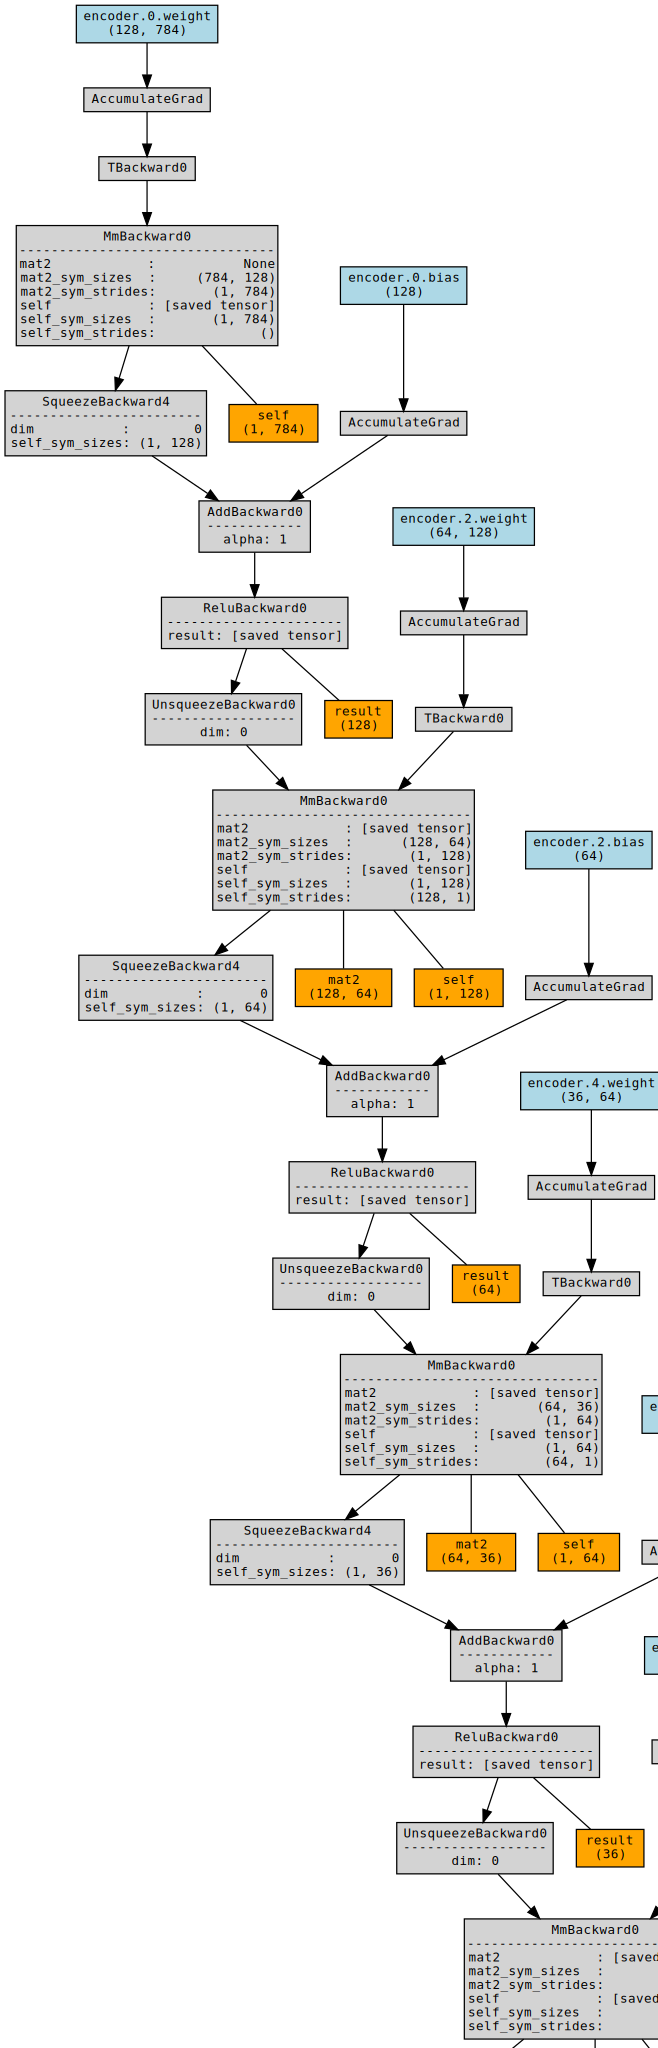

In [88]:
from torchviz import make_dot

make_dot(yhat,
         params=dict(list(model.named_parameters())),
         show_attrs=True,
         show_saved=True)

In [ ]:
make_dot(yhat).render(format='png')

'Digraph.gv.png'